In [1]:
#import libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
ratings = pd.read_csv( '/Users/cdmstudent/Desktop/DSC-540 Adv ML/Final Project/ChatBot/PersonalizedBookSearch/goodbooks-10k/ratings.csv' )
to_read = pd.read_csv( '/Users/cdmstudent/Desktop/DSC-540 Adv ML/Final Project/ChatBot/PersonalizedBookSearch/goodbooks-10k/to_read.csv' )
books = pd.read_csv( '/Users/cdmstudent/Desktop/DSC-540 Adv ML/Final Project/ChatBot/PersonalizedBookSearch/goodbooks-10k/books.csv' )

tags = pd.read_csv( '/Users/cdmstudent/Desktop/DSC-540 Adv ML/Final Project/ChatBot/PersonalizedBookSearch/goodbooks-10k/tags.csv' )
book_tags = pd.read_csv( '/Users/cdmstudent/Desktop/DSC-540 Adv ML/Final Project/ChatBot/PersonalizedBookSearch/goodbooks-10k/book_tags.csv')



In [3]:
books.head(5)

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [4]:
books.shape

(10000, 23)

In [5]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    10000 non-null  int64  
 1   goodreads_book_id          10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 non-null  int6

In [6]:
books.describe()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn13,original_publication_year,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
count,10000.00000,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,9.415000e+03,9979.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04
mean,5000.50000,5.264697e+06,5.471214e+06,8.646183e+06,75.712700,9.755044e+12,1981.987674,4.002191,5.400124e+04,5.968732e+04,2919.955300,1345.040600,3110.885000,11475.893800,1.996570e+04,2.378981e+04
std,2886.89568,7.575462e+06,7.827330e+06,1.175106e+07,170.470728,4.428619e+11,152.576665,0.254427,1.573700e+05,1.678038e+05,6124.378132,6635.626263,9717.123578,28546.449183,5.144736e+04,7.976889e+04
min,1.00000,1.000000e+00,1.000000e+00,8.700000e+01,1.000000,1.951703e+08,-1750.000000,2.470000,2.716000e+03,5.510000e+03,3.000000,11.000000,30.000000,323.000000,7.500000e+02,7.540000e+02
25%,2500.75000,4.627575e+04,4.791175e+04,1.008841e+06,23.000000,9.780316e+12,1990.000000,3.850000,1.356875e+04,1.543875e+04,694.000000,196.000000,656.000000,3112.000000,5.405750e+03,5.334000e+03
50%,5000.50000,3.949655e+05,4.251235e+05,2.719524e+06,40.000000,9.780452e+12,2004.000000,4.020000,2.115550e+04,2.383250e+04,1402.000000,391.000000,1163.000000,4894.000000,8.269500e+03,8.836000e+03
75%,7500.25000,9.382225e+06,9.636112e+06,1.451775e+07,67.000000,9.780831e+12,2011.000000,4.180000,4.105350e+04,4.591500e+04,2744.250000,885.000000,2353.250000,9287.000000,1.602350e+04,1.730450e+04
max,10000.00000,3.328864e+07,3.553423e+07,5.639960e+07,3455.000000,9.790008e+12,2017.000000,4.820000,4.780653e+06,4.942365e+06,155254.000000,456191.000000,436802.000000,793319.000000,1.481305e+06,3.011543e+06


In [7]:
books['authors'].unique()

array(['Suzanne Collins', 'J.K. Rowling, Mary GrandPré',
       'Stephenie Meyer', ..., 'Ian Mortimer', 'Peggy Orenstein',
       'John Keegan'], dtype=object)

In [8]:
len(books['authors'].unique())

4664

In [9]:
books['average_rating'].sort_values(ascending=False)

3627    4.82
3274    4.77
861     4.77
8853    4.76
7946    4.76
        ... 
9020    2.80
4008    2.80
8006    2.76
3549    2.67
1792    2.47
Name: average_rating, Length: 10000, dtype: float64

In [10]:
# clean the data
books['authors'].value_counts(dropna=False)


Stephen King                                                                                                                                                                                                                              60
Nora Roberts                                                                                                                                                                                                                              59
Dean Koontz                                                                                                                                                                                                                               47
Terry Pratchett                                                                                                                                                                                                                           42
Agatha Christie                                     

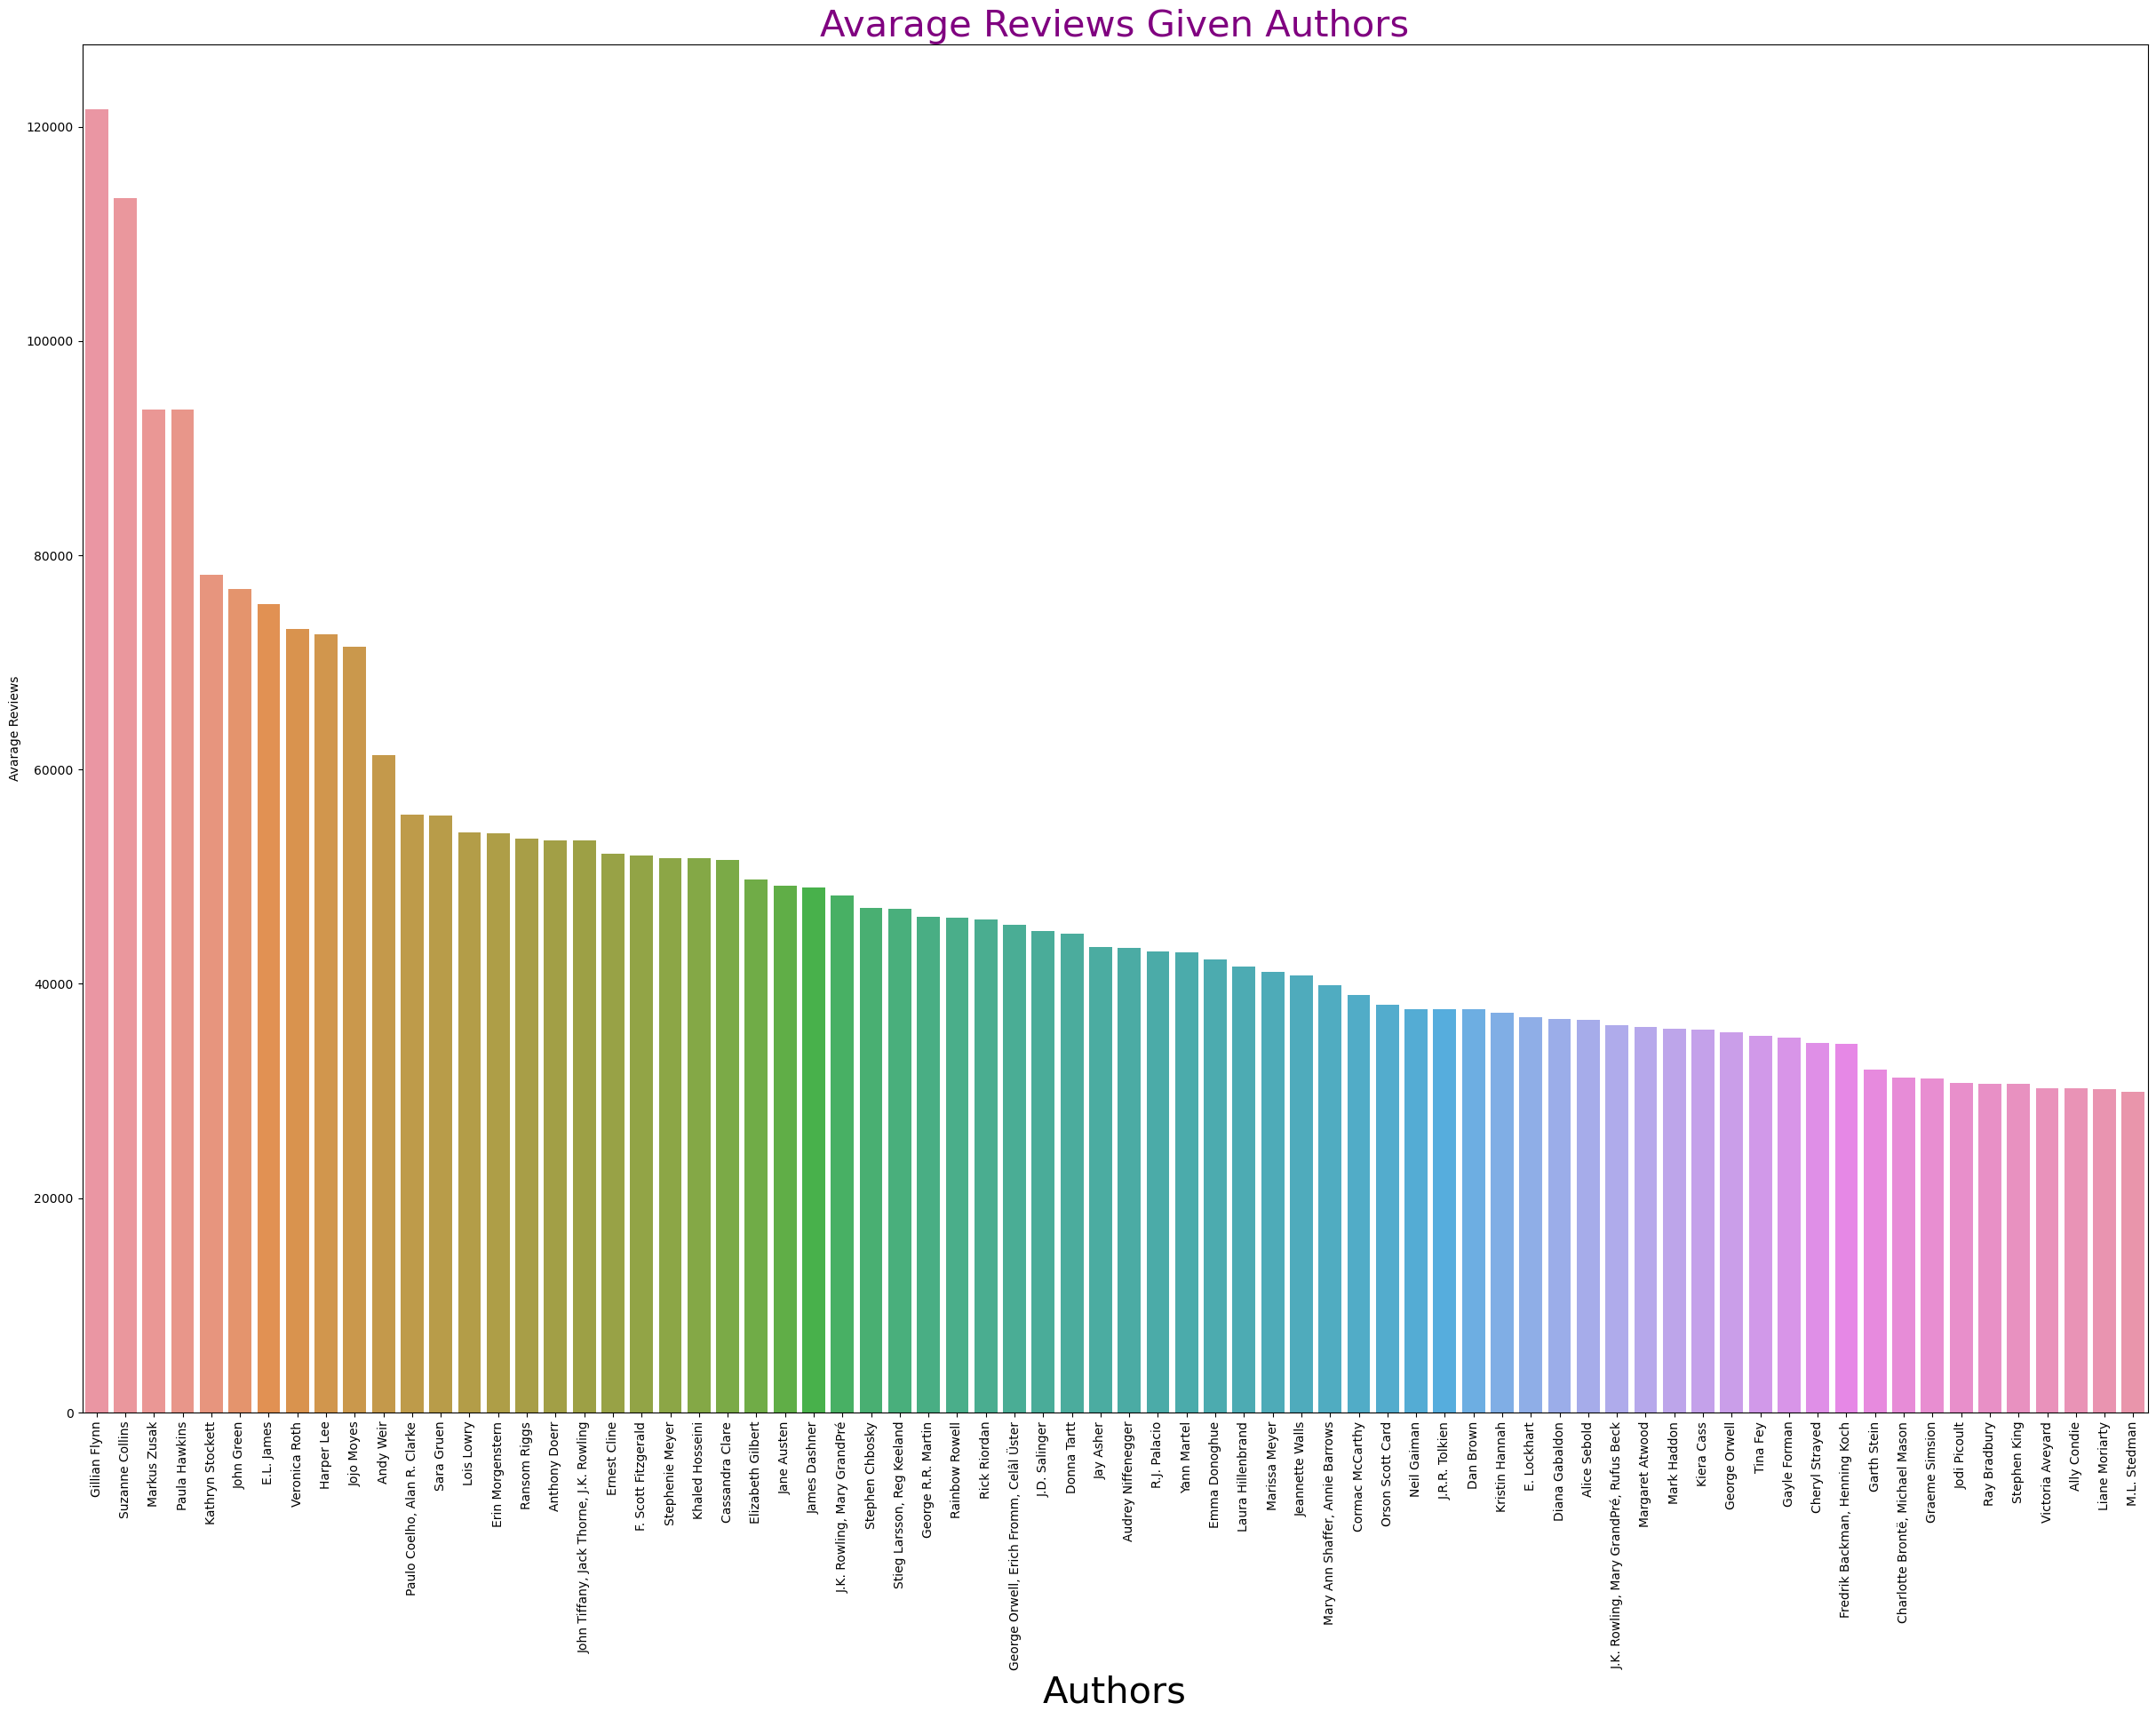

In [11]:
# the avarage reviews that given authors on goodreads.
df = books.work_text_reviews_count>29700
books_newdata2=books[df]
melted_books2= pd.melt(frame=books_newdata2,id_vars='authors',value_vars='work_text_reviews_count')
reviews_list= list(melted_books2['authors'].unique())
author_reviews_ratio=[]

for i in reviews_list:
    x= melted_books2[melted_books2['authors']==i]
    author_reviews_ratio_rate=sum(x.value)/len(x)
    author_reviews_ratio.append(  author_reviews_ratio_rate)

data = pd.DataFrame({'reviews_list':reviews_list,'author_reviews_ratio':author_reviews_ratio})
new_index = (data['author_reviews_ratio'].sort_values(ascending=False)).index.values
sorted_data2 = data.reindex(new_index)

#visualization
plt.figure(figsize=(30,20))
sns.barplot(x=sorted_data2['reviews_list'],y=sorted_data2['author_reviews_ratio'])
plt.xticks(rotation= 90)
plt.xlabel('Authors',size='30')
plt.ylabel('Avarage Reviews')
plt.title('Avarage Reviews Given Authors',color='purple',size='30')
plt.show()

### Gillian Flynn, suzanne Collins, Markus Zusak, PaulaHawkins has more Avg Reviews.

In [12]:
#change some features' name.
data1= books.head(50)
data1.rename(columns={'ratings_1':'R1', 'ratings_2':'R2','ratings_3':'R3','ratings_4':'R4','ratings_5':'R5'}, inplace=True)

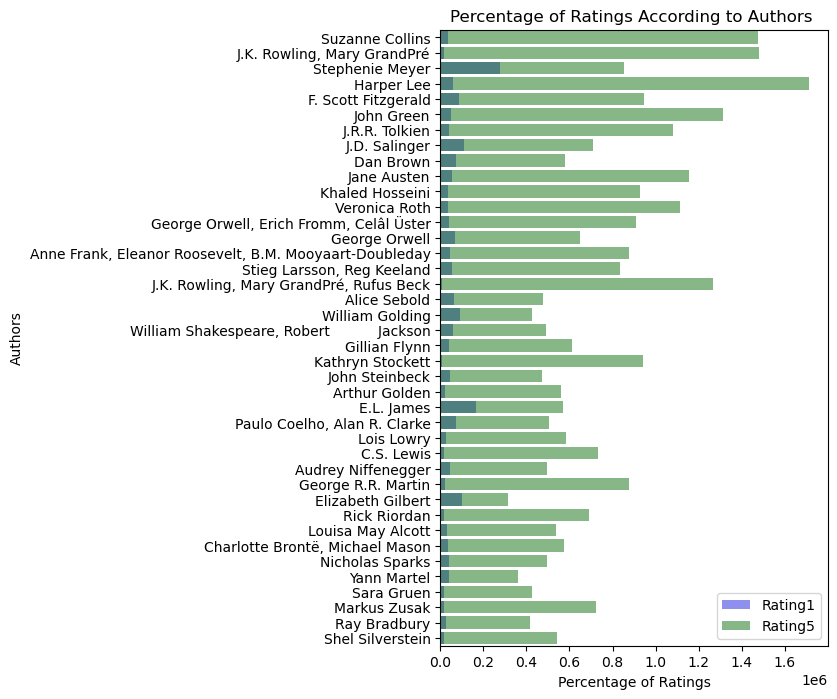

In [13]:
# Percentage of Ratings According to Authors
author_list= list(data1['authors'].unique())

ratings1= []
ratings5= []
for i in author_list:
    
    x = data1[data1['authors']==i]
    ratings1.append(sum(x.R1)/len(x))
    ratings5.append(sum(x.R5)/len(x))

#ratings1.sort(reverse=True)
#ratings5.sort(reverse=True)
#ratings1 = ratings1[:50]
#ratings5 = ratings5[:50]
f,ax = plt.subplots(figsize = (5,8))
sns.barplot(x=ratings1,y=author_list,color='blue',alpha = 0.5,label='Rating1' )
sns.barplot(x=ratings5,y=author_list,color='green',alpha = 0.5,label='Rating5' )
ax.legend(loc='lower right',frameon = True)   
ax.set(xlabel='Percentage of Ratings', ylabel='Authors',title = "Percentage of Ratings According to Authors ")
plt.show()

In [14]:
# prepare data frames
df2004 = books[books.original_publication_year == 2004].iloc[:200,:]
df2005 = books[books.original_publication_year == 2005].iloc[:200,:]
df2003 = books[books.original_publication_year == 2003].iloc[:200,:]

import plotly.graph_objs as go
trace1 =go.Scatter(
                    x = data1.average_rating,
                    y = data1.R1,
                    mode = "markers",
                    name = "2004",
                    marker = dict(color = 'rgba(0, 255, 0, 0.8)'),
                    text= df2004.authors)
trace2 =go.Scatter(
                    x = data1.average_rating,
                    y = data1.R2,
                    mode = "markers",
                    name = "2005",
                    marker = dict(color = 'rgba(255, 0, 0, 0.8)'),
                    text= df2005.authors)
trace3 =go.Scatter(
                    x = data1.average_rating,
                    y = data1.R3,
                    mode = "markers",
                    name = "2003",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)'),
                    text= df2003.authors)
data = [trace1, trace2, trace3]
layout = dict(
              xaxis= dict(title= 'Average Ratings',ticklen= 9,zeroline= False),
              yaxis= dict(title= 'Ratings(Count)',ticklen= 9,zeroline= False),
              title = "Ratings(Count) and Avarage Ratings of 2004/2005/2006"
             )
fig = dict(data = data, layout = layout)
iplot(fig)

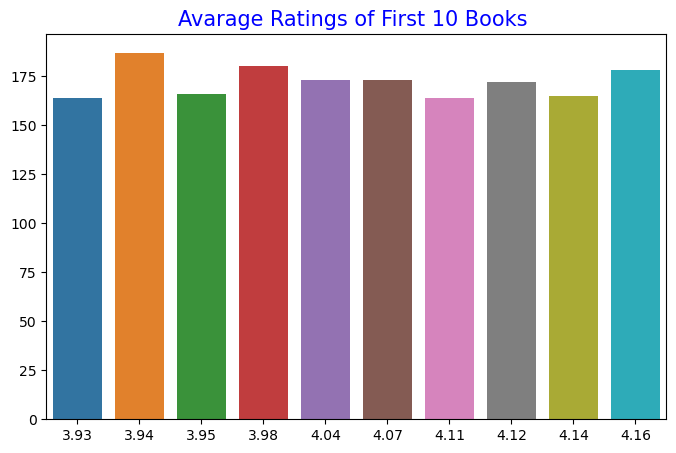

In [15]:
data3=books.head(6)
sta = books.average_rating.value_counts().index[:10]  
plt.figure(figsize = (8,5))
sns.barplot(x=sta,y =books.average_rating.value_counts().values[:10]) 
plt.title('Avarage Ratings of First 10 Books ',color = 'blue',fontsize=15)
plt.show()

In [16]:
df = books[books.original_publication_year == 2014].iloc[:10,:]

import plotly.graph_objs as go

x = df.authors
trace1 = {
  'x': x,
  'y': df.ratings_1,
  'name': 'ratings_1',
  'type': 'bar'
};
trace2 = {
  'x': x,
  'y': df.ratings_2,
  'name': 'ratings_2',
  'type': 'bar'
};
data = [trace1, trace2];
layout = {
  'xaxis': {'title': 'Top 3 Authors'},
  'barmode': 'relative',
  'title': 'Ratings1 and Ratings2 of Top 10 Authors in 2014'
};
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [17]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

df = books[books.original_publication_year == 2009].iloc[:7,:]
pie1 = df.ratings_1
df1 = books[books.original_publication_year == 2010].iloc[:7,:]
pie2 = df1.ratings_1
labels = df.authors.value_counts().index

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=pie1, name="Number Of Authors Rates"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=pie1, name="Number Of Authors Rates"),
              1, 2)
# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.45, hoverinfo="label+percent+name")
fig.update_layout(
    height=800, width=800,
    title_text="Number of Authors Ratings Rates",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='2009', x=0.175, y=0.5, font_size=14, showarrow=False),
                 dict(text='2010', x=0.82, y=0.5, font_size=14, showarrow=False)])
fig.show()

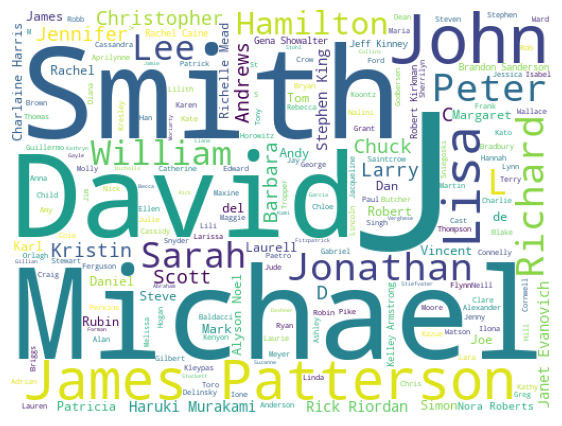

In [18]:
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
df1 = books.authors[books.original_publication_year == 2009]
plt.subplots(figsize=(7,7))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(df1))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')
plt.show()

In [19]:
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
df1 = books[books.original_publication_year == 2009]
trace0 = go.Scatter(
    y=df1.ratings_1,
    name = 'Rating1',
    marker = dict(
        color = 'rgb(12, 12, 140)',
    )
)
trace1 = go.Scatter(
    y=df1.ratings_2,
    name = 'Rating2',
     xaxis='x2',
     yaxis='y2',
    marker = dict(
        color = 'rgb(12, 128, 128)',
    )
)
data = [trace0, trace1]
layout = go.Layout(
    xaxis2=dict(
        domain=[0.6, 0.95],
        anchor='y2',        
    ),
    yaxis2=dict(
        domain=[0.6, 0.95],
        anchor='x2',
    ),
    title = 'Ratings1 and Ratings2 of 2009'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [20]:
books2= books.drop(columns=['work_id','book_id','best_book_id','best_book_id','isbn13','original_publication_year',"image_url","small_image_url"])

In [21]:
books2.corr()

,goodreads_book_id,books_count,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
goodreads_book_id,1.000000,-0.164578,-0.024848,-0.073023,-0.063760,0.118845,-0.038375,-0.056571,-0.075634,-0.063310,-0.056145
books_count,-0.164578,1.000000,-0.069888,0.324235,0.333664,0.198698,0.225763,0.334923,0.383699,0.349564,0.279559
average_rating,-0.024848,-0.069888,1.000000,0.044990,0.045042,0.007481,-0.077997,-0.115875,-0.065237,0.036108,0.115412
ratings_count,-0.073023,0.324235,0.044990,1.000000,0.995068,0.779635,0.723144,0.845949,0.935193,0.978869,0.964046
work_ratings_count,-0.063760,0.333664,0.045042,0.995068,1.000000,0.807009,0.718718,0.848581,0.941182,0.987764,0.966587
work_text_reviews_count,0.118845,0.198698,0.007481,0.779635,0.807009,1.000000,0.572007,0.696880,0.762214,0.817826,0.764940
ratings_1,-0.038375,0.225763,-0.077997,0.723144,0.718718,0.572007,1.000000,0.926140,0.795364,0.672986,0.597231
ratings_2,-0.056571,0.334923,-0.115875,0.845949,0.848581,0.696880,0.926140,1.000000,0.949596,0.838298,0.705747
ratings_3,-0.075634,0.383699,-0.065237,0.935193,0.941182,0.762214,0.795364,0.949596,1.000000,0.952998,0.825550
ratings_4,-0.063310,0.349564,0.036108,0.978869,0.987764,0.817826,0.672986,0.838298,0.952998,1.000000,0.933785


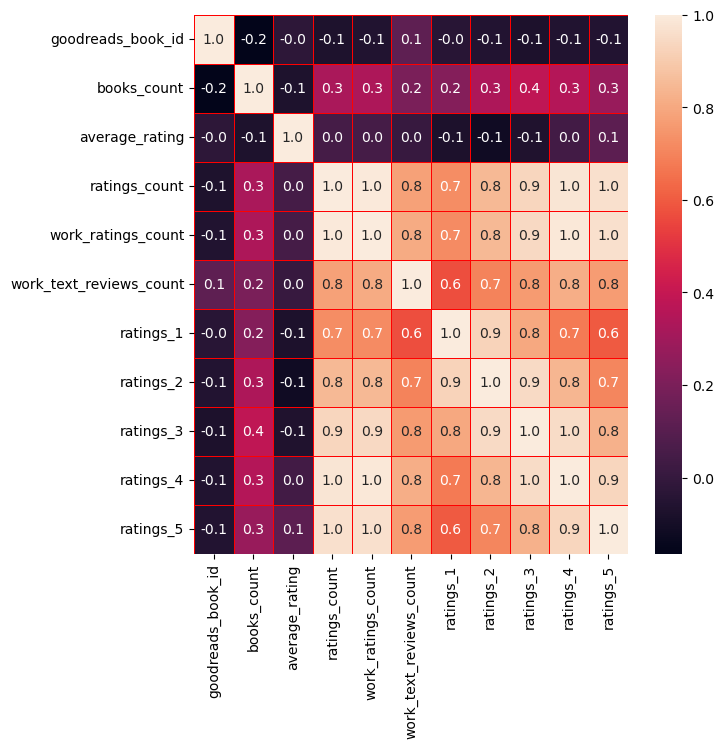

In [22]:
f,ax = plt.subplots(figsize=(7,7))
sns.heatmap(books2.corr(), annot=True, linewidths=0.6,linecolor="red", fmt= '.1f',ax=ax)
plt.show() 

In [27]:
from scipy import stats
data_new = pd.DataFrame({'ratings_1':ratings1,'ratings2':ratings2})
g = sns.jointplot(data_new.ratings1, data_new.ratings2, kind="kde", size=5)
plt.show()

NameError: name 'ratings2' is not defined

In [ ]:
sns.lmplot(x="ratings_3", y="work_ratings_count", data=books2)
plt.show()

Lm Plot shows the results of a linear regression within each dataset can be used in Machine learning (for instance when solving a regression problem).